# Final

In [1]:
# run 1
import io
import re
import json
import math
import string
import requests
import numpy as np
import pandas as pd
from pprint import pprint
#from bs4 import BeautifulSoup
import matplotlib.colors as colors
#from pandas.io.json import json_normalize

# graphing 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# run 2
# import folium if cant install then import
try:
    import folium
except:
    !pip install folium
    print("installed {}".format('folium'))
    import folium
    
# import wikipedia if cant install then import
try:
    import wikipedia as wp
except:
    !pip install wikipedia
    print("installed {}".format('wikipedia'))
    import wikipedia

# zip code stuff
try:
    import uszipcode
except:
    !pip install uszipcode
    print("installed {}".format('uszipcode'))
    import uszipcode
    
from uszipcode import Zipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

# graph imports 
try:
    import geopy 
    from geopy.geocoders import Nominatim
except:
    !pip install geopy
    print("installed {}".format('geopy'))
    import geopy 
    from geopy.geocoders import Nominatim

# learn imports
#try:
#    import seaborn as sns
#except:
#    !pip install seaborn
#    print("installed {}".format('seaborn'))
#    import seaborn as sns
  
#from sklearn import linear_model
#from sklearn import preprocessing
#from sklearn.cluster import KMeans
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import mean_squared_error, r2_score

### Category Functions

In [3]:
def returnCats():
  RC = [
      'Afghan Restaurant',
      'American Restaurant',
      'Asian Restaurant',
      'BBQ Joint',
      'Bagel Shop',
      'Bakery',
      'Bar',
      'Beer Bar',
      'Breakfast Spot',
      'Brewery',
      'Bubble Tea Shop',
      'Burger Joint',
      'Café',
      'Cajun / Creole Restaurant',
      'Chinese Restaurant',
      'Cocktail Bar',
      'Coffee Shop',
      'College Cafeteria',
      'Creperie',
      'Cuban Restaurant',
      'Cupcake Shop',
      'Deli / Bodega',
      'Dive Bar',
      'Doner Restaurant',
      'Donut Shop',
      'Ethiopian Restaurant',
      'Farmers Market',
      'Fast Food Restaurant',
      'Fish Market',
      'Food',
      'Food & Drink Shop',
      'Food Truck',
      'French Restaurant',
      'Fried Chicken Joint',
      'Gastropub',
      'Greek Restaurant',
      'Hot Dog Joint',
      'Hotel Bar',
      'Ice Cream Shop',
      'Indian Restaurant',
      'Irish Pub',
      'Italian Restaurant',
      'Japanese Restaurant',
      'Juice Bar',
      'Mediterranean Restaurant',
      'Mexican Restaurant',
      'New American Restaurant',
      'Noodle House',
      'Peruvian Restaurant',
      'Pizza Place',
      'Portuguese Restaurant',
      'Pub',
      'Restaurant',
      'Salvadoran Restaurant',
      'Sandwich Place',
      'Seafood Restaurant',
      'Southern / Soul Food Restaurant',
      'Speakeasy',
      'Steakhouse',
      'Sushi Restaurant',
      'Taco Place',
      'Tex-Mex Restaurant',
      'Thai Restaurant',
      'Theme Restaurant',
      'Vegetarian / Vegan Restaurant',
      'Vietnamese Restaurant',
      'Wine Bar'
  ]
  return RC

### Math:

In [4]:
# imports 
from statistics import mode
from statistics import mean
from statistics import median

# functions
def getMin(l1): # l1 is a list
  return min(l1)

def getMax(l1): # l1 is a list
  return max(l1)

def getMedian(val):
  return median(val)
 
def getMode(val):
  return mode(val)

def getMean(val):
  return mean(val)

# checks if all vals in a list are equal
def checkEqual(L):
  return L[1:] == L[:-1]

### Load Data

In [5]:
# Baltimore url
b_url = 'https://raw.githubusercontent.com/sschatz1997/Coursera_Capstone_IBM/master/DATA/Baltimore.csv'
b_master = pd.read_csv(b_url, index_col=False)

# delete the id column
b_master = b_master.drop(columns=['id'])

# Richmond url
r_url = 'https://raw.githubusercontent.com/sschatz1997/Coursera_Capstone_IBM/master/DATA/Richmond.csv'
r_master = pd.read_csv(r_url, index_col=False)

# delete the id column
r_master = r_master.drop(columns=['id'])

# Phoenix url
p_url = 'https://raw.githubusercontent.com/sschatz1997/Coursera_Capstone_IBM/master/DATA/Phoenix.csv'
p_master = pd.read_csv(p_url, index_col=False)

# delete the id column
p_master = p_master.drop(columns=['id'])

# Houston url
h_url = 'https://raw.githubusercontent.com/sschatz1997/Coursera_Capstone_IBM/master/DATA/Houston.csv'
h_master = pd.read_csv(h_url, index_col=False)

# delete the id column
h_master = h_master.drop(columns=['id'])

# Venue Colors
v_url = 'https://raw.githubusercontent.com/sschatz1997/Coursera_Capstone_IBM/master/DATA/venue_colors.csv'
venue_colors = pd.read_csv(v_url, index_col=False)

# delete the id column
venue_colors = venue_colors.drop(columns=['id'])

### Add all data together

In [23]:
def combineMasters(bg, rg, pg, hg):
  all_master = pd.concat([bg, rg, pg, hg])
  #print(len(all_masters))
  return all_master

all_master = combineMasters(b_master, r_master, p_master, h_master)


### Price Point calcs

Get min value of all categories get max and use a box plot to show the values. Do this for each city then combine them for the total. This can be done in two sets of two because they shar the values. Then do same thing with income.  Using zips as the label. Then do the same for the housing income. Then for housing.

In [37]:
# percentile function
def get_per99(L):
  return np.percentile(L, 99)

def get_per75(L):
  return np.percentile(L, 75)

def get_per25(L):
  return np.percentile(L, 25)

def get_per5(L):
  return np.percentile(L, 5)

# process one city at a time
def ppc1(master):
  """
  list format = [category, valsL, total, [min, max, median, per99, per75, per25, per5]] and maybe color
  cat1 = list(master['Venue Category'])
  val1 = list(master['Price Point'])
  master2 = list(master)
  """

  c1 = []
  c2 = []
  c3 = []
  m1 = []

  # loop to creat cat list
  for index, row in master.iterrows():
    #print('{}'.format(m))
    #print('{} | {}'.format(row['Venue Category'], row['Price Point']))
    c1.append([row['Venue Category']])
    m1.append([row['Venue Category']])

  # loop to creat unique list
  for c in c1:
    t = sum(x.count(c[0]) for x in c1)
    out = [c[0],t]
    if out not in c2:
      c2.append(out)
    #pprint(c[0])

  # loop to colect values
  # [min, max, median, per99, per75, per25, per5]
  for c in c2:
    t1 = list(master.loc[master['Venue Category'] == c[0]]['Price Point'])
    c.append(t1)
    t2 = [getMin(t1), getMax(t1), getMedian(t1), get_per99(t1), get_per75(t1), get_per25(t1), get_per5(t1)]
    c.append(t2)
  #print(list(master.loc[master['Venue Category'] == c2[0][0]]['Price Point']))

  for c in c2:
    if checkEqual(c[2]) == False:
      c3.append(c)

  #print('C2: \n\n')
  #pprint(c2)
  #print('C3: \n\n')
  #pprint(c3)

  return c3, c2 # goodData, then badData
  

In [38]:
# Baltimore
b_ppG, b_ppB = ppc1(b_master)

# Richmond
r_ppG, r_ppB = ppc1(r_master)

# Phoenix
p_ppG, p_ppB = ppc1(p_master)

# Houston
h_ppG, h_ppB = ppc1(h_master)

# all
a_ppG, a_ppB = ppc1(all_master)

In [39]:
def graphGD(bg, rg, pg, hg):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()

  width = 10
  height = 8

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()
  fig2 = plt.figure(figsize=(width, height))
  ax2 = fig2.subplots()
  fig3 = plt.figure(figsize=(width, height))
  ax3 = fig3.subplots()
  fig4 = plt.figure(figsize=(width, height))
  ax4 = fig4.subplots()

  labelsb = []
  alldatab = []
  for b in bg:
    labelsb.append(b[0])
    alldatab.append(b[3])

  bplot1 = ax1.boxplot(alldatab,
                      vert=True,
                      patch_artist=True,
                      labels=labelsb)
  ax1.tick_params(axis='x', rotation=15, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('Baltimore box plot', size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('Price Points', size=15)
  ax1.set_ylabel('Observed values', size=15)

  labelsr = []
  alldatar = []
  for r in rg:
    labelsr.append(r[0])
    alldatar.append(r[3])

  bplot2 = ax2.boxplot(alldatar,
                      vert=True,
                      patch_artist=True,
                      labels=labelsr)
  ax2.tick_params(axis='x', rotation=15, labelsize=15)
  ax2.tick_params(axis='y', labelsize=15)
  ax2.set_title('Richmand box plot', size=15)
  ax2.yaxis.grid(True)
  ax2.set_xlabel('Price Points', size=15)
  ax2.set_ylabel('Observed values', size=15)

  labelsp = []
  alldatap = []
  for p in pg:
    labelsp.append(p[0])
    alldatap.append(p[3])

  bplot3 = ax3.boxplot(alldatap,
                      vert=True,
                      patch_artist=True,
                      labels=labelsp)
  ax3.tick_params(axis='x', rotation=15, labelsize=15)
  ax3.tick_params(axis='y', labelsize=15)
  ax3.set_title('Phoenix box plot', size=15)
  ax3.yaxis.grid(True)
  ax3.set_xlabel('Price Points', size=15)
  ax3.set_ylabel('Observed values', size=15)

  labelsh = []
  alldatah = []
  for h in hg:
    labelsh.append(h[0])
    alldatah.append(h[3])

  bplot4 = ax4.boxplot(alldatah,
                      vert=True,
                      patch_artist=True,
                      labels=labelsh)
  ax4.tick_params(axis='x', rotation=15, labelsize=15)
  ax4.tick_params(axis='y', labelsize=15)
  ax4.set_title('Houston box plot', size=15)
  ax4.yaxis.grid(True)
  ax4.set_xlabel('Price Points', size=15)
  ax4.set_ylabel('Observed values', size=15)

  plt.show()

def graphAll_BP(data):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()

  width = 10
  height = 8

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()

  labela = []
  dA = []

  for d in data:
    labela.append(d[0])
    dA.append(d[3])
  
  bplot1 = ax1.boxplot(dA,
                      vert=True,
                      patch_artist=True,
                      labels=labela)
  ax1.tick_params(axis='x', rotation=75, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('All Cities box plot', size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('Price Points', size=15)
  ax1.set_ylabel('Observed values', size=15)

  plt.show()


### Graph each city

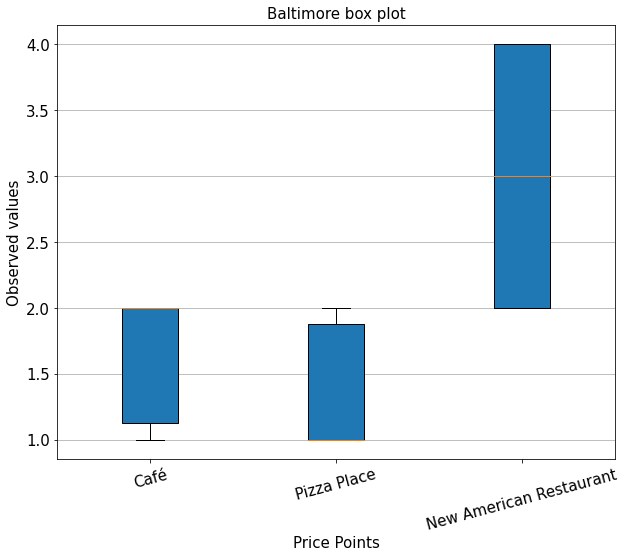

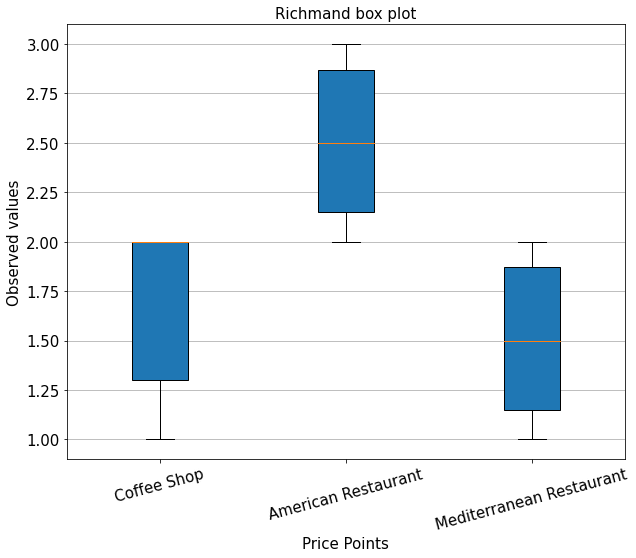

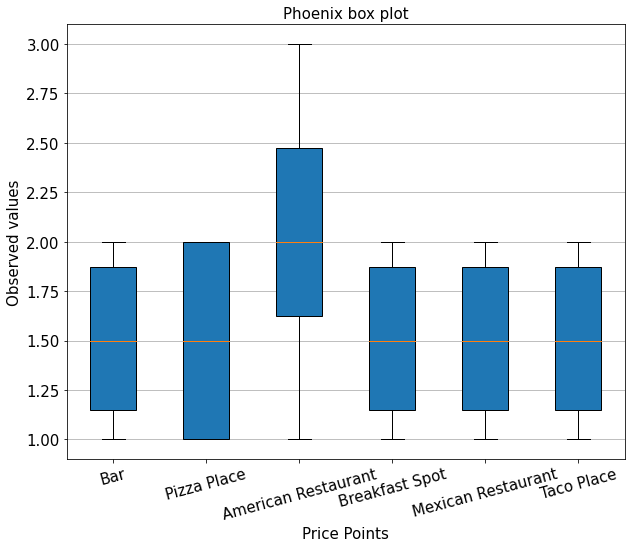

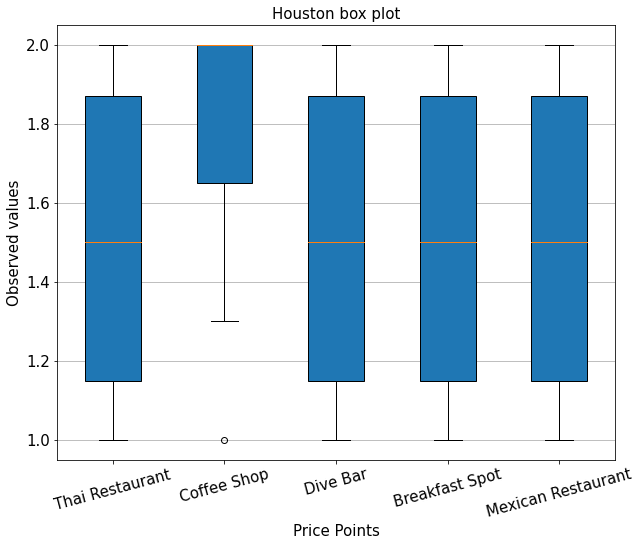

In [40]:
graphGD(b_ppG, r_ppG, p_ppG, h_ppG)

### Graph all cities

### Show Same Entries

In [11]:
print("Balitmore: \n")
pprint(b_ppB)

print("\nRichmond: \n")
pprint(r_ppB)

print("\nPhoenix: \n")
pprint(p_ppB)

print("\nHouston: \n")
pprint(h_ppB)

Balitmore: 

[['Portuguese Restaurant', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Sandwich Place',
  12,
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1.0, 1.0, 1.0, 1.0, 1.0]],
 ['Fish Market', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Coffee Shop', 4, [2, 2, 2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Peruvian Restaurant', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Italian Restaurant', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Café', 6, [2, 2, 1, 2, 2, 1], [1, 2, 2.0, 2.0, 2.0, 1.25, 1.0]],
 ['Ethiopian Restaurant', 2, [1, 1], [1, 1, 1.0, 1.0, 1.0, 1.0, 1.0]],
 ['Indian Restaurant', 6, [2, 2, 2, 2, 2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Hotel Bar', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Pizza Place', 6, [1, 2, 1, 1, 2, 1], [1, 2, 1.0, 2.0, 1.75, 1.0, 1.0]],
 ['Gastropub', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],
 ['Thai Restaurant', 2, [1, 1], [1, 1, 1.0, 1.0, 1.0, 1.0, 1.0]],
 ['Farmers Market', 2, [2, 2], [2, 2, 2.0, 2.0, 2.0, 2.0, 2.0]],

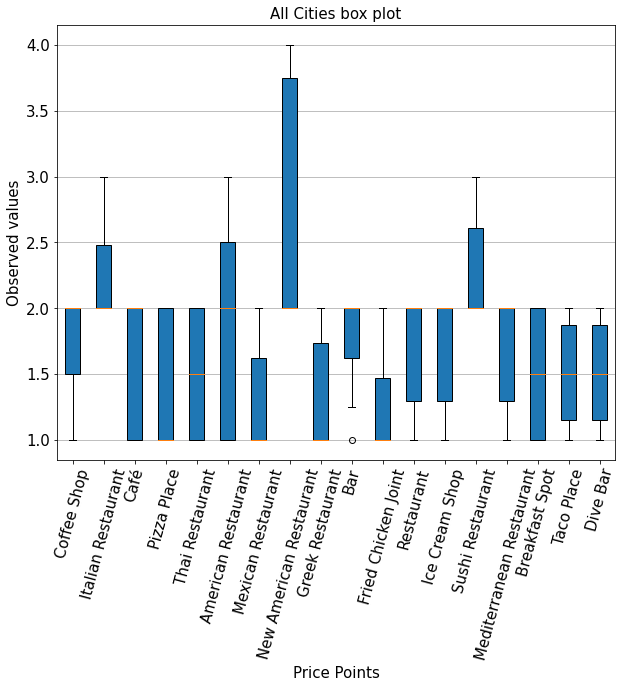

In [41]:
graphAll_BP(a_ppG)

In [42]:
#list format = [category, valsL, [min, max, median, per99, per75, per25, per5]] and maybe color

for a1 in a_ppB:
  print('Category: {} || Max: {} || Min: {}'.format(a1[0], a1[3][0], a1[3][1]))

Category: Portuguese Restaurant || Max: 2 || Min: 2
Category: Sandwich Place || Max: 1 || Min: 1
Category: Fish Market || Max: 2 || Min: 2
Category: Coffee Shop || Max: 1 || Min: 2
Category: Peruvian Restaurant || Max: 2 || Min: 2
Category: Italian Restaurant || Max: 2 || Min: 3
Category: Café || Max: 1 || Min: 2
Category: Ethiopian Restaurant || Max: 1 || Min: 1
Category: Indian Restaurant || Max: 2 || Min: 2
Category: Hotel Bar || Max: 2 || Min: 2
Category: Pizza Place || Max: 1 || Min: 2
Category: Gastropub || Max: 2 || Min: 2
Category: Thai Restaurant || Max: 1 || Min: 2
Category: Farmers Market || Max: 2 || Min: 2
Category: Donut Shop || Max: 1 || Min: 1
Category: American Restaurant || Max: 1 || Min: 3
Category: Bakery || Max: 2 || Min: 2
Category: Mexican Restaurant || Max: 1 || Min: 2
Category: Seafood Restaurant || Max: 2 || Min: 2
Category: New American Restaurant || Max: 2 || Min: 4
Category: Chinese Restaurant || Max: 1 || Min: 1
Category: Steakhouse || Max: 4 || Min: 4
Cat

### Get Population box plots Funcrions

In [43]:
def popBoxPlotPop(master, city): # only 2 boxs 'Population' and 'Population Density'
  # list format pop [city, [min, max, median, per99, per75, per25, per5]]
  # list format popd [city, [min, max, median, per99, per75, per25, per5]]
  #'Population','Population Density',

  pop = []
  popi = [] # inner list
  popD = []
  popdi = [] # inner list
  ptotal = 0
  pdtotal = 0

  # get data from dataframe
  for index, row in master.iterrows():
    pop.append(row['Population']) # int
    popD.append(row['Population Density']) # float
    ptotal += row['Population']
    pdtotal += row['Population Density']

  # process pop data
  popi.append(getMin(pop))
  popi.append(getMax(pop))
  popi.append(getMedian(pop))
  popi.append(get_per99(pop))
  popi.append(get_per75(pop))
  popi.append(get_per25(pop))
  popi.append(get_per5(pop))
  pop_out = [city, popi]
  #pprint(pop_out)

  # process popd data
  popdi.append(getMin(popD))
  popdi.append(getMax(popD))
  popdi.append(getMedian(popD))
  popdi.append(get_per99(popD))
  popdi.append(get_per75(popD))
  popdi.append(get_per25(popD))
  popdi.append(get_per5(popD))
  popd_out = [city, popdi]
  #pprint(popd_out)

  return pop_out, popd_out

# delete nan
h_master = h_master[pd.notnull(h_master['Population Density'])]

# popBbp, popdBbp == 'Population' and 'Population Density' proccessed
popBbp, popdBbp = popBoxPlotPop(b_master, 'Baltimore')
popRbp, popdRbp = popBoxPlotPop(r_master, 'Richmond')
popPbp, popdPbp = popBoxPlotPop(p_master, 'Phoenix')
popHbp, popdHbp= popBoxPlotPop(h_master, 'Houston')
tot_bp, totd_bp = popBoxPlotPop(all_master, 'Population')

# population combined
pop_c = [popBbp] + [popRbp] + [popPbp] + [popHbp]

# population combined
popd_c = [popdBbp] + [popdRbp] + [popdPbp] + [popdHbp]

# toal pop 
totalPOP = [tot_bp] + [totd_bp]

### Graph Population box plots 

In [44]:
def graphPopCities(pop):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()

  width = 10
  height = 8

  labels = [
    'Baltimore',
    'Richmond',
    'Phoenix',
    'Houston'
  ]
  data = []

  for p in pop:
    #labels.append(p[0])
    data.append(p[1])
    #print("ss: ",p[1])

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()

  bplot1 = ax1.boxplot(data,
                      vert=True,
                      patch_artist=True,
                      labels=labels)
  ax1.tick_params(axis='x', rotation=15, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('Population per City box plot', size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('City', size=15)
  ax1.set_ylabel('Population', size=15)

  plt.show()

def graphPopDCities(pop):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()

  width = 10
  height = 8

  labels = [
    'Baltimore',
    'Richmond',
    'Phoenix',
    'Houston'
  ]
  data = []

  for p in pop:
    #labels.append(p[0])
    data.append(p[1])

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()

  bplot1 = ax1.boxplot(data,
                      vert=True,
                      patch_artist=True,
                      labels=labels)
  ax1.tick_params(axis='x', rotation=15, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('Population Density per City box plot', size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('City', size=15)
  ax1.set_ylabel('Population Density', size=15)

  plt.show()

def graphPopAllCities(pop):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()

  width = 10
  height = 8

  labels = ['Population','Population Density']
  data = []

  for p in pop:
    data.append(p[1])

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()

  bplot1 = ax1.boxplot(data,
                      vert=True,
                      patch_artist=True,
                      labels=labels)
  ax1.tick_params(axis='x', rotation=15, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('{} and {} For all citties box plot'.format(labels[0], labels[1]), size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('All', size=15)
  ax1.set_ylabel('{} and {}'.format(labels[0], labels[1]), size=15)

  plt.show()

### Population and Population Density per City box plot

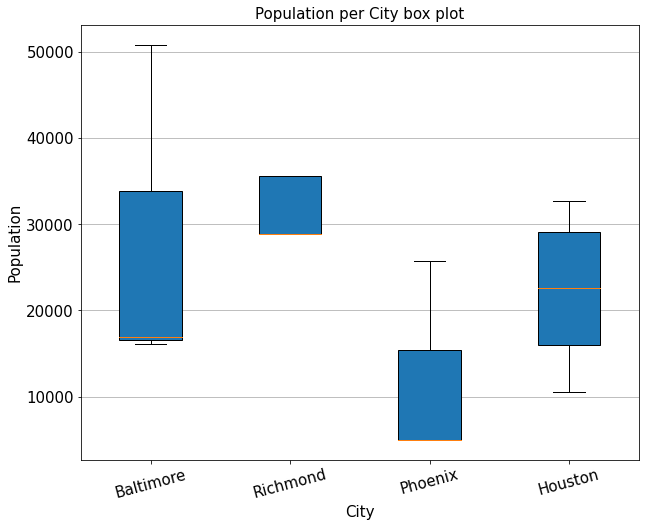

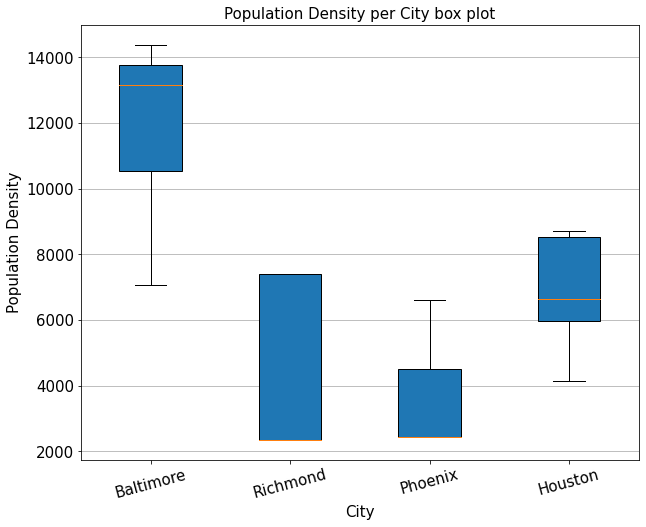

In [45]:
#pprint(pop_c)
graphPopCities(pop_c)
graphPopDCities(popd_c)


### All Population box plot

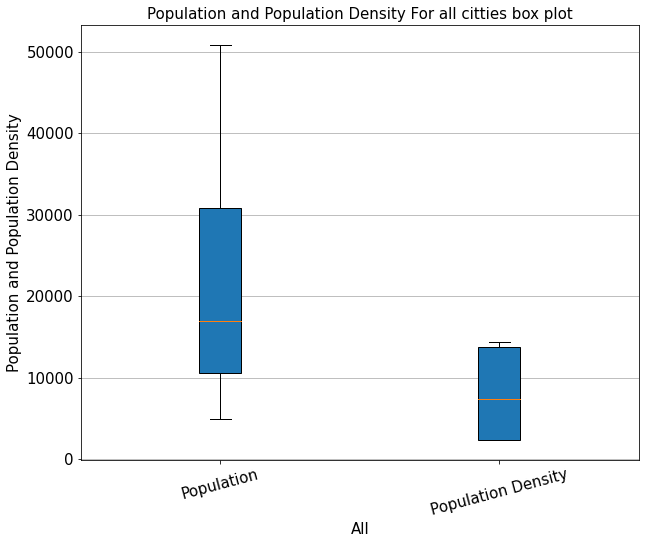

In [46]:
graphPopAllCities(totalPOP)

### Get Median Home Value Functions:


In [47]:
def hvBoxPlot(master, city): # only home value
  # list format pop [city, [min, max, median, per99, per75, per25, per5]]
  out = [city]
  hv = list(master['Median Home Value'])

  temp = [getMin(hv), getMax(hv), getMedian(hv), get_per99(hv), get_per75(hv), get_per25(hv), get_per5(hv)]
  out.append(temp)
  return out
  
hvdb = hvBoxPlot(b_master, 'Baltimore')
hvdr = hvBoxPlot(r_master, 'Richmond')
hvdp = hvBoxPlot(p_master, 'Phoenix')
hvdh = hvBoxPlot(h_master, 'Houston')
tot_hvb = hvBoxPlot(all_master, 'All')
comb_hvd = [hvdb] +  [hvdr] +  [hvdp] +  [hvdh] + [tot_hvb]

In [48]:
def graphhV(pop):
  np.random.seed(19680801)
  # ax1, ax2, ax3, ax4 = plt.figure() #, sharex=True, sharey=True) plt.figure()
  width = 10
  height = 8

  labels = ['Baltimore','Richmond','Phoenix','Houston','All']
  data = []

  for p in pop:
    data.append(p[1])

  fig1 = plt.figure(figsize=(width, height))
  ax1 = fig1.subplots()

  bplot1 = ax1.boxplot(data,
                      vert=True,
                      patch_artist=True,
                      labels=labels)
  ax1.tick_params(axis='x', rotation=15, labelsize=15)
  ax1.tick_params(axis='y', labelsize=15)
  ax1.set_title('Median Home Value box plot', size=15)
  ax1.yaxis.grid(True)
  ax1.set_xlabel('City', size=15)
  ax1.set_ylabel('Value', size=15)

  plt.show()


### Graphed Median Home Value

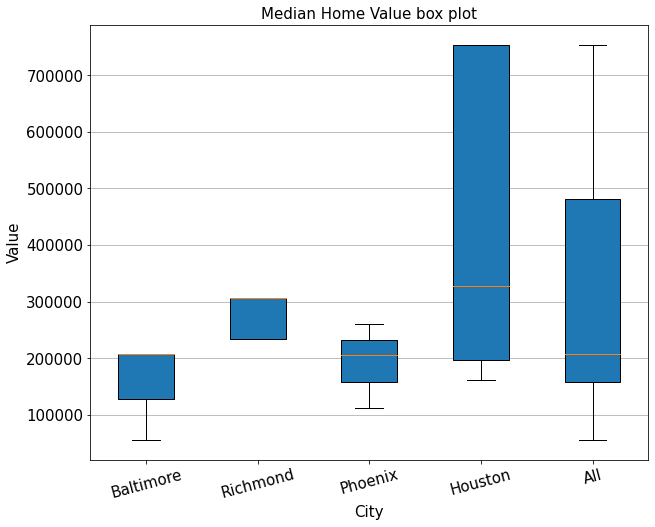

In [49]:
graphhV(comb_hvd)

### Relationship between Restaurant Price and Median Home Value


In [54]:
# relationship functions:
"""
function
this gets a price point, mhv df
relationship between pp, mhv
"""
def pp_mhv(master):
  pp = []
  mhv = []
  vc = []

  for index, row in master.iterrows():
    pp.append(row['Price Point'])
    mhv.append(row['Median Home Value'])
    vc.append(row['Venue Category'])

  ndf = {
      'PP':pp,
      'MHV':mhv
      #'VC':vc
  }

  out = pd.DataFrame(ndf, columns=['PP', 'MHV'])#, 'VC'])
  out = out.sort_values(['PP', 'MHV'])
  return out

"""
graph function
relationship between pp, mhv
"""
def pp_mhv_graph(b_r1, r_r1, p_r1, h_r1): #, a_r1):
  c1 = [
    'Baltimore PP vs MHV',
    'Richmond PP vs MHV',
    'Phoenix PP vs MHV',
    'Houston PP vs MHV'
  ]

  #np.random.seed(19680801)
  #data = data.sort_values(['PP', 'MHV'])
  columns = ['PP', 'MHV']
  d1 = [list(b_r1['MHV']), list(b_r1['PP'])]
  d2 = [list(r_r1['MHV']), list(r_r1['PP'])]
  d3 = [list(p_r1['MHV']), list(p_r1['PP'])]
  d4 = [list(h_r1['MHV']), list(h_r1['PP'])]
  #d5 = [list(a_r1['MHV']), list(a_r1['PP'])]
  plt.figure(figsize=(10,10))
  #f, a = plt.subplots()
  plt.plot(d1[1], d1[0], color='red', label=c1[0], linestyle='--')
  plt.plot(d2[1], d2[0], color='blue', label=c1[1], linestyle='-.')
  plt.plot(d3[1], d3[0], color='green', label=c1[2], linestyle=':')
  plt.plot(d4[1], d4[0], color='black', label=c1[3], linestyle='-')
  #plt.plot(d5[1], d5[0])

  plt.legend(loc="upper right")
  plt.title('Price Point (PP) vs Median Home Value (MHV)', size=15)
  plt.xticks(size=15)
  plt.yticks(size=15)
  plt.xlabel("MHV X Price", size=15)
  plt.ylabel("PP Y Pricw Point", size=15)

  plt.show()


In [53]:
# relationship functions:
"""
function
relationship between total housing units (thu) and mhv
"""
def thu_mhv(master):
  thu = []
  mhv = []

  for index, row in master.iterrows():
    thu.append(row['Total Housing Units'])
    mhv.append(row['Median Home Value'])

  ndf = {
      'THU':thu,
      'MHV':mhv
  }

  out = pd.DataFrame(ndf, columns=['THU', 'MHV'])#, 'VC'])
  out = out.sort_values(['THU', 'MHV'])
  return out

"""
graph function
relationship between total housing units (thu) and mhv
"""
def thu_mhv_graph(b_r2, r_r2, p_r2, h_r2): #, a_r2):
  c1 = [
    'Baltimore THU vs MHV',
    'Richmond THU vs MHV',
    'Phoenix THU vs MHV',
    'Houston THU vs MHV'
  ]

  #np.random.seed(19680801)
  #data = data.sort_values(['THU', 'MHV'])
  columns = ['THU', 'MHV']

  d1 = [list(b_r2['MHV']), list(b_r2['THU'])]
  d2 = [list(r_r2['MHV']), list(r_r2['THU'])]
  d3 = [list(p_r2['MHV']), list(p_r2['THU'])]
  d4 = [list(h_r2['MHV']), list(h_r2['THU'])]
  #d5 = [list(a_THU['MHV']), list(a_THU['THU'])]
  plt.figure(figsize=(10,10))
  #f, a = plt.subplots()
  plt.plot(d1[1], d1[0], color='red', label=c1[0], linestyle='--')
  plt.plot(d2[1], d2[0], color='blue', label=c1[1], linestyle='-.')
  plt.plot(d3[1], d3[0], color='green', label=c1[2], linestyle=':')
  plt.plot(d4[1], d4[0], color='black', label=c1[3], linestyle='-')
  #plt.plot(d5[1], d5[0])


  plt.legend(loc="upper right")
  plt.title('Total Housing Units (THU) vs Median Home Value (MHV)', size=15)
  plt.xticks(size=15)
  plt.yticks(size=15)
  plt.xlabel("MHV X Price", size=15)
  plt.ylabel("THU Y Units", size=15)

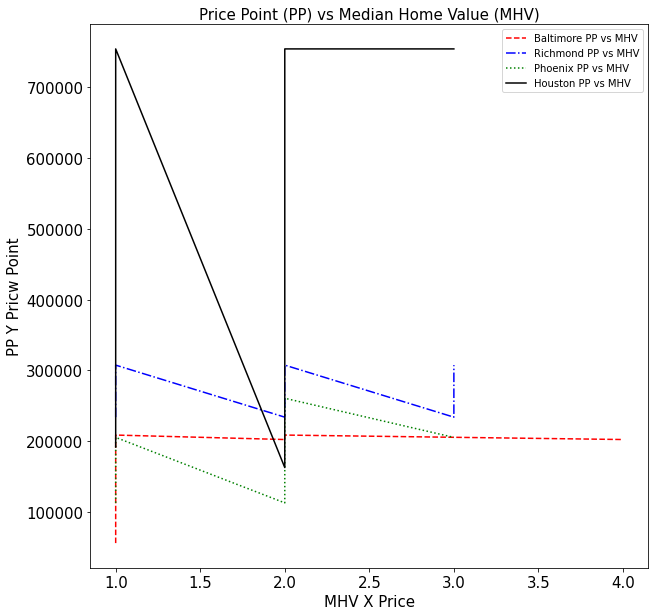

In [55]:
# defines || relationship 1
b_r1 = pp_mhv(b_master)
r_r1 = pp_mhv(r_master)
p_r1 = pp_mhv(p_master)
h_r1 = pp_mhv(h_master)
a_r1 = pp_mhv(all_master)

l_r1 = [b_r1, r_r1, p_r1, h_r1]
pp_mhv_graph(b_r1, r_r1, p_r1, h_r1)


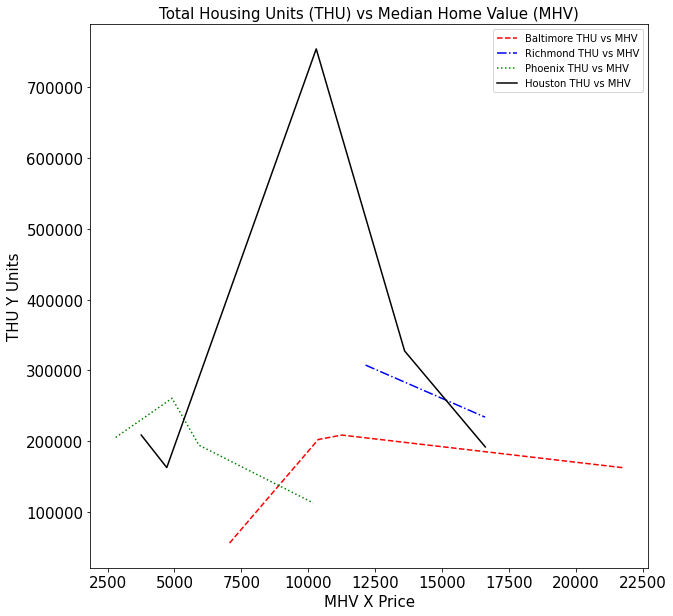

In [58]:
# defines || relationship 2
b_r2 = thu_mhv(b_master)
r_r2 = thu_mhv(r_master)
p_r2 = thu_mhv(p_master)
h_r2 = thu_mhv(h_master)
a_r2 = thu_mhv(all_master)

l_r2 = [b_r2, r_r2, p_r2, h_r2]
thu_mhv_graph(b_r2, r_r2, p_r2, h_r2)